In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro
import statsmodels.api as sm 
import pylab as py 
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [0]:
import io
fish_df = pd.read_csv(io.BytesIO(uploaded['Fish.csv']))

In [4]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish_df.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


In [6]:
fish_df.isnull()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


In [7]:
fish_df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
fish_df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

(array([59., 31., 12., 18., 16., 11.,  8.,  1.,  0.,  3.]),
 array([   0.,  165.,  330.,  495.,  660.,  825.,  990., 1155., 1320.,
        1485., 1650.]),
 <a list of 10 Patch objects>)

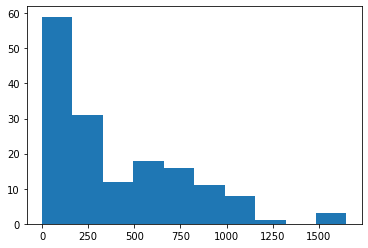

In [9]:
plt.hist('Weight', data = fish_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee45e2588>,
      dtype=object)

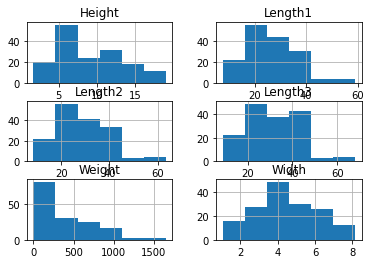

In [10]:
fish_df.hist(bins=6)

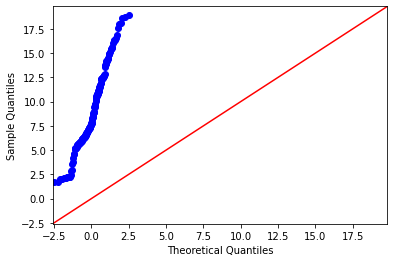

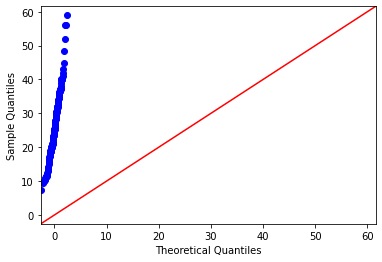

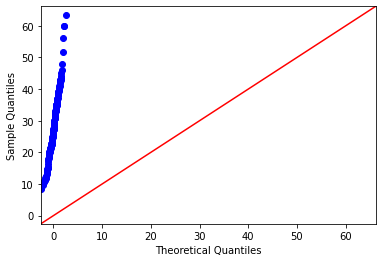

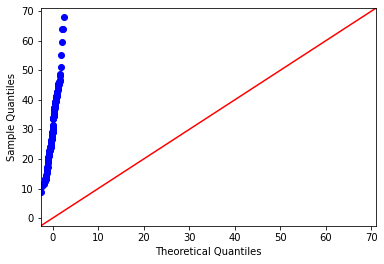

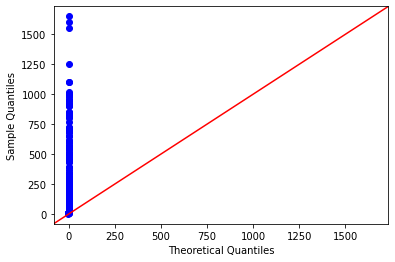

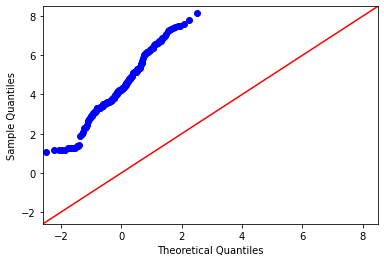

In [11]:
import statsmodels.api as sm
import pylab
sm.qqplot(fish_df['Height'], line='45') 
sm.qqplot(fish_df['Length1'], line='45') 
sm.qqplot(fish_df['Length2'], line='45') 
sm.qqplot(fish_df['Length3'], line='45')
sm.qqplot(fish_df['Weight'], line='45') 
sm.qqplot(fish_df['Width'], line='45') 
pylab.show()

In [12]:
from scipy.stats import shapiro
stat1, p1 = shapiro( fish_df['Height'])
print(f'Height Normality: {stat1, p1}')
stat2, p2 = shapiro( fish_df['Length1'])
print(f'Length1 Normality {stat2, p2}')
stat3, p3 = shapiro( fish_df['Length2'])
print(f'Lenght2 Normality {stat3, p3}')
stat4, p4 = shapiro( fish_df['Length3'])
print(f'Length3 Normality: {stat4, p4}')
stat4, p4 = shapiro( fish_df['Weight'])
print(f'Weight Normality: {stat4, p4}')
stat5, p5 = shapiro( fish_df['Width'])
print(f'Width Normality: {stat5, p5}')

Height Normality: (0.9608746767044067, 0.0001852199638960883)
Length1 Normality (0.9705248475074768, 0.0017712621483951807)
Lenght2 Normality (0.9726985692977905, 0.0030527820345014334)
Length3 Normality: (0.9725810885429382, 0.0029632383957505226)
Weight Normality: (0.8834666609764099, 7.605901464202702e-10)
Width Normality: (0.978858232498169, 0.015361800789833069)


Segundo o teste de Shapiro Wilk, temos evidencias para rejeitar a hipotese nula e afirmar que as distribuições Não são normais. 
1) Aplicaremos métodos para normalizar os dados
caso não seja possível melhorar a normalização dos dados 
2) aplicar métodos standard de scaling dos dados. Robust Scaler e/ou standard scaler => média 0 - std 1

In [13]:
plt.boxplot('Weight', data=fish_df_feat)

NameError: ignored

In [14]:
fish_weight_low = fish_df_feat[fish_df_feat['Weight']==0]
fish_weight_high = fish_df_feat[fish_df_feat['Weight']>1300]

NameError: ignored

In [15]:
fish_weight_low
#Eliminar os outliers e o valor zero, pois um peixe não pesa zero
#index 142 143 144 e 40

NameError: ignored

In [0]:
fish_df_outlier = fish_df.drop([40, 142, 143, 144])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2ee4085400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2ee4085e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ee40938d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ee4093550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2ee4085710>,
  <matplotlib.lines.Line2D at 0x7f2ee4085a90>]}

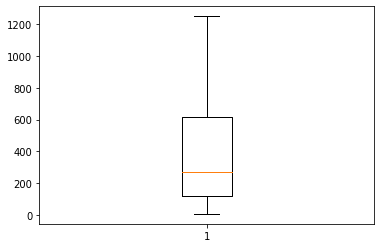

In [17]:
plt.boxplot('Weight', data=fish_df_outlier)

In [0]:
fish_df_feat = fish_df_outlier.drop('Species', axis=1)

In [0]:
from scipy.stats import boxcox
fish_df_height = boxcox(fish_df_feat['Height'], 0.62)
fish_df_length1 = boxcox(fish_df_feat['Length1'], 0.62)
fish_df_length2 = boxcox(fish_df_feat['Length2'], 0.62)
fish_df_length3 = boxcox(fish_df_feat['Length3'], 0.62)
fish_df_width = boxcox(fish_df_feat['Width'], 1)
fish_df_weight = boxcox(fish_df_feat['Weight'], 0.4)
#stat, p = shapiro(fish_df_normal)
#print(f'normality: {stat, p}')
#plt.hist(fish_df_normal)
#lambda = -1. is a reciprocal transform.
#lambda = -0.5 is a reciprocal square root transform.
##lambda = 0.0 is a log transform.
#lambda = 0.5 is a square root transform.
#lambda = 1.0 is no transform.

In [0]:
fish_df_height = pd.DataFrame(fish_df_height, columns=['height'])
fish_df_length1 = pd.DataFrame(fish_df_length1, columns=['length1'])
fish_df_length2 = pd.DataFrame(fish_df_length2, columns=['length2'])
fish_df_length3 = pd.DataFrame(fish_df_length3, columns=['length3'])
fish_df_width = pd.DataFrame(fish_df_width, columns=['width'])
fish_df_weight = pd.DataFrame(fish_df_weight, columns=['weight'])

In [21]:
fish_df_height

,height
0,5.727313
1,6.100772
2,6.061547
3,6.196214
4,6.086969
...,...
150,0.934810
151,1.184044
152,1.073514
153,1.489924


In [22]:
fish_df_cleaned = pd.concat([fish_df_height, fish_df_length1, fish_df_length2, fish_df_length3, fish_df_width, fish_df_weight ], 
                            axis=1, 
                            sort=False)
fish_df_cleaned.head()


,height,length1,length2,length3,width,weight
0,5.727313,9.716600,10.371191,11.673991,3.0200,19.962917
1,6.100772,9.957255,10.632719,12.001047,3.3056,21.649003
2,6.061547,9.927341,10.690372,11.973977,3.6961,23.235439
3,6.196214,10.632719,11.397629,12.614842,3.4555,23.918166
4,6.086969,10.690372,11.397629,12.746131,4.1340,25.770103


In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [0]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_scaled = scaler.fit_transform(fish_df_cleaned)
robust_scaled_df = pd.DataFrame(robust_scaled, columns=['Height', 'Length1', 'Length2', 'Length3', 'Weight', 'Width'])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fish_df_cleaned)
standard_scaler_df = pd.DataFrame(scaled_data, columns=['Height', 'Length1', 'Length2', 'Length3', 'Weight', 'Width'])

In [66]:
robust_scaled_df.describe()

,Height,Length1,Length2,Length3,Weight,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.139012,0.004301,0.010349,0.035001,0.064552,0.030891
std,0.682739,0.698709,0.712325,0.676364,0.802819,0.639759
min,-1.224147,-1.612865,-1.615668,-1.553185,-1.533228,-1.178887
25%,-0.301112,-0.475579,-0.452514,-0.401578,-0.412989,-0.419769
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.698888,0.524421,0.547486,0.598422,0.587011,0.580231
max,1.523793,1.762344,1.793723,1.639093,1.865938,1.263897


In [67]:
standard_scaler_df.describe()

,Height,Length1,Length2,Length3,Weight,Width
count,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02
mean,-1.676079e-16,5.013910e-16,1.203339e-16,-2.850766e-16,1.719055e-17,5.443674e-17
std,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00
min,-2.003076e+00,-2.322011e+00,-2.290089e+00,-2.355734e+00,-1.996663e+00,-1.897121e+00
25%,-6.467346e-01,-6.890362e-01,-6.518985e-01,-6.475708e-01,-5.967586e-01,-7.067048e-01
50%,-2.042691e-01,-6.176055e-03,-1.457585e-02,-5.191599e-02,-8.066727e-02,-4.844189e-02
75%,8.227020e-01,7.468149e-01,7.565056e-01,8.357154e-01,6.528895e-01,8.614513e-01
max,2.034848e+00,2.524288e+00,2.511711e+00,2.379328e+00,2.251099e+00,1.933546e+00


Apenas conseguimos padronizar as unidades com o Robust Scalar e o Standard Scaler. Desta forma os valores estão todos entre o valor 0 e com um std aprox de 1. Observando os minimos e os máximos, decidimos optar pelo robust scalar devido ao reduzido desvio padrão

In [68]:
fish = pd.concat([robust_scaled_df, fish_df['Species'] ], 
                            axis=1, 
                            sort=False)
fish.head()

,Height,Length1,Length2,Length3,Weight,Width,Species
0,0.579891,-0.138827,-0.116564,0.043573,-0.109051,-0.068676,Bream
1,0.712624,-0.076639,-0.050665,0.117380,0.027790,0.039041,Bream
2,0.698683,-0.084369,-0.036137,0.111272,0.214891,0.140392,Bream
3,0.746546,0.097910,0.142077,0.255898,0.099612,0.184009,Bream
4,0.707718,0.112809,0.142077,0.285526,0.424704,0.302322,Bream


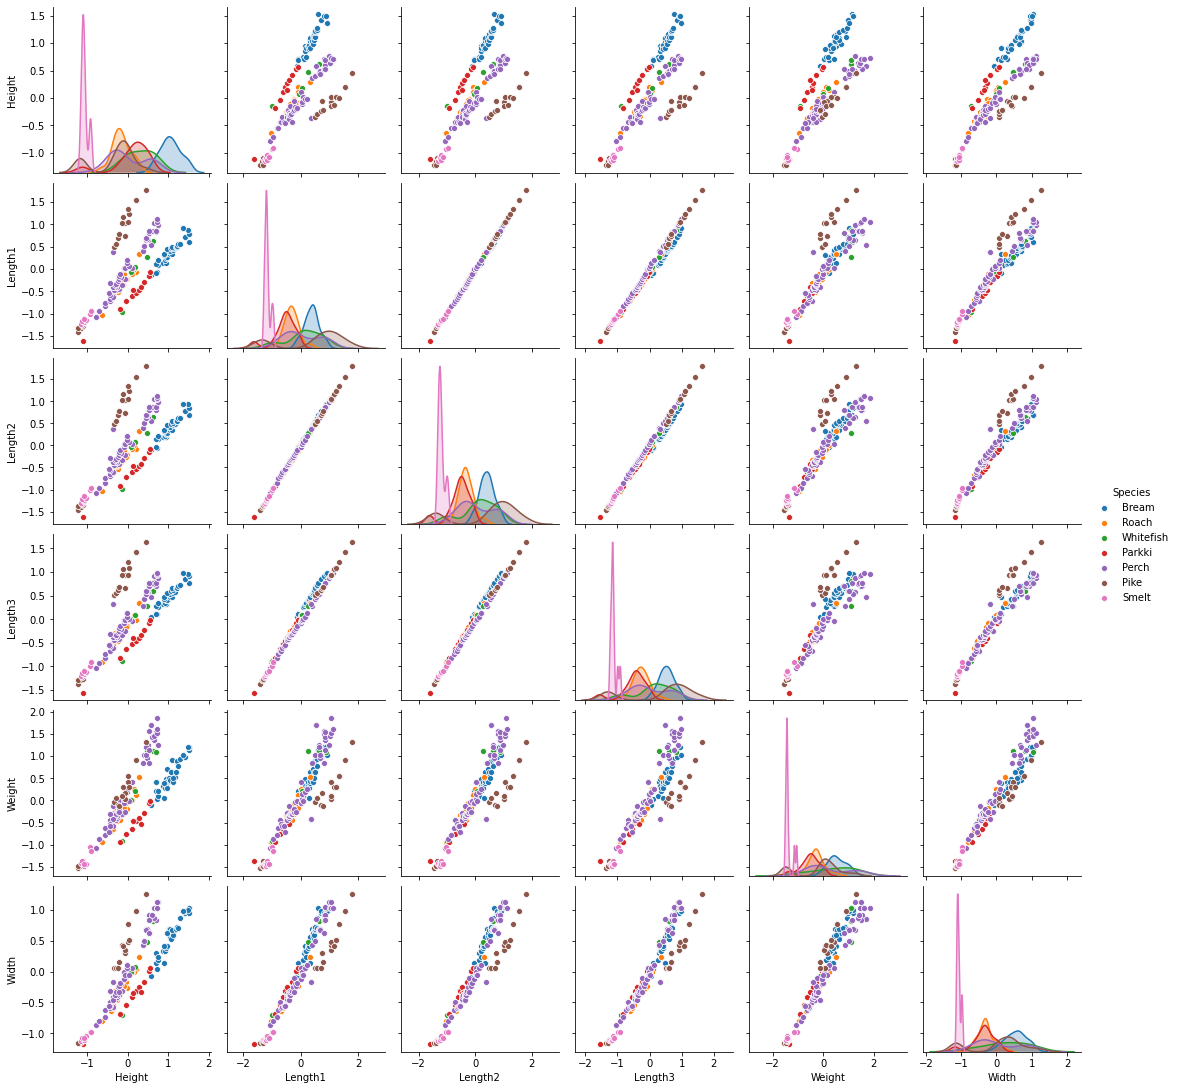

In [69]:
sns.pairplot(data=fish, hue="Species")

Não é possível discriminar as especies por features. As especies não farão parte da label y. A única label que se irá prever é o peso/weight por regression

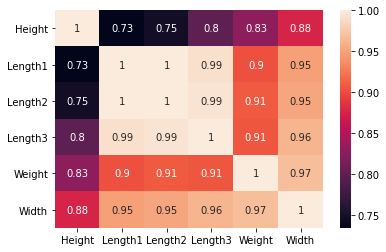

In [70]:
myBasicCorr = fish.corr()
sns.heatmap(myBasicCorr, annot = True)

Para que a previsão tenha um melhor MSE será retirada a coluna que apresenta uma menor correlação - HEIGHT

In [0]:
fish = fish.drop('Height', axis=1)

In [72]:
dummy_species = pd.get_dummies(fish['Species'])
dummy_species.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [32]:
fish

,Length1,Length2,Length3,Weight,Width,Species
0,-0.138827,-0.116564,0.043573,-0.109051,-0.068676,Bream
1,-0.076639,-0.050665,0.117380,0.027790,0.039041,Bream
2,-0.084369,-0.036137,0.111272,0.214891,0.140392,Bream
3,0.097910,0.142077,0.255898,0.099612,0.184009,Bream
4,0.112809,0.142077,0.285526,0.424704,0.302322,Bream
...,...,...,...,...,...,...
154,-0.944995,-0.957847,-0.908538,-1.134780,-0.975432,Smelt
155,NaN,NaN,NaN,NaN,NaN,Smelt
156,NaN,NaN,NaN,NaN,NaN,Smelt
157,NaN,NaN,NaN,NaN,NaN,Smelt


In [0]:
fish_Cspecies = pd.concat((dummy_species, fish), axis=1)

In [0]:
#eliminar index 155 156 157 158
fish_Cspecies = fish_Cspecies.drop([155, 156, 157, 158])


In [0]:
fish_Cspecies = fish_Cspecies.drop('Species', axis=1)

In [0]:
fish_Sspecies = fish.drop([155, 156, 157, 158])

In [0]:
fish_Sspecies = fish.drop('Species', axis=1)

In [0]:
#fish_Sspecies (sem especies)
#fish_Cspecies (com especies)

TREINAR O MODELO

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Com a coluna/dummy Espécies

In [0]:
#x = ww2_final.drop(['Id', 'Species'], axis = 1)
x = fish_Cspecies.drop('Weight', axis=1)
y = fish_Cspecies['Weight']

In [0]:
x_train, x_test, y_train, y_test = train_test_split ( x, y , test_size=0.2, random_state=42)

In [42]:
lm = linear_model.LinearRegression()
lm_cvs = cross_val_score(lm, x, y, cv = 4)
print (lm_cvs)
print (lm_cvs.mean())
#normal fit
#lm_model = lm.fit(x_train, y_train)
#predictions = lm.predict(x_test)

[0.58840723 0.94805142 0.94327738 0.95898585]
0.859680469842916


In [0]:
#normal fit
lm = linear_model.LinearRegression()
lm_model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [44]:
print(f'Mean Square Error for Weight with fish_CSpecies is: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

Mean Square Error for Weight with fish_CSpecies is: 0.1398382666658381


Sem a coluna/dummy Espécies

In [0]:
fish_Sspecies = fish_Sspecies.drop([155, 156, 157, 158])

In [46]:
fish_Sspecies

,Length1,Length2,Length3,Weight,Width
0,-0.138827,-0.116564,0.043573,-0.109051,-0.068676
1,-0.076639,-0.050665,0.117380,0.027790,0.039041
2,-0.084369,-0.036137,0.111272,0.214891,0.140392
3,0.097910,0.142077,0.255898,0.099612,0.184009
4,0.112809,0.142077,0.285526,0.424704,0.302322
...,...,...,...,...,...
150,-1.171753,-1.219775,-1.135671,-1.367448,-1.069340
151,-1.151389,-1.200355,-1.127265,-1.427148,-1.052728
152,-1.111055,-1.142799,-1.102190,-1.433472,-1.069340
153,-1.002666,-1.021448,-0.987802,-1.044703,-0.977563


In [0]:
x = fish_Sspecies.drop('Weight', axis=1)
y = fish_Sspecies['Weight']

In [0]:
x_train, x_test, y_train, y_test = train_test_split ( x, y , test_size=0.2, random_state=42)

In [49]:
lm = linear_model.LinearRegression()
lm_cvs = cross_val_score(lm, x, y, cv = 4)
print (lm_cvs)
print (lm_cvs.mean())
#normal fit
#lm_model = lm.fit(x_train, y_train)
#predictions = lm.predict(x_test)

[0.67800334 0.8922704  0.92723742 0.90234964]
0.8499651991653073


In [0]:
#normal fit
lm = linear_model.LinearRegression()
lm_model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [51]:
print(f'Mean Square Error for Weight without fish_CSpecies is: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

Mean Square Error for Weight without fish_CSpecies is: 0.17328339694247955


Sem qualquer grid search, o Data Set com espécies tem um melhor resultado 0.85 com um MSE de 0.13

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8] 
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5)
grid.fit(x_train, y_train)  

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)  
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9594277650115066

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.2}


In [0]:
gbm = GradientBoostingRegressor(learning_rate=0.02, n_estimators=500, max_depth=6, subsample=0.2)
gbm_model = gbm.fit(x_train, y_train)
predictions = gbm_model.predict(x_test)

In [168]:
print(f'Mean Square Error for Weight without fish_CSpecies using Gradient Boosting Model is: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')
print('Mean Square Error for Weight with fish_CSpecies using Linear Regression Model is: 0.139838')

Mean Square Error for Weight without fish_CSpecies using Gradient Boosting Model is: 0.13908605455159123
Mean Square Error for Weight with fish_CSpecies using Linear Regression Model is: 0.139838


Prever novos inputs

In [0]:
from sklearn import preprocessing
robust_scaled = preprocessing.RobustScaler().fit(fish_df_cleaned)
robust_scaled2 = robust_scaled.transform(fish_df_cleaned)
robust_scaled_df = pd.DataFrame(robust_scaled2, columns=['Height', 'Length1', 'Length2', 'Length3', 'Weight', 'Width'])

In [0]:
new_input_scaled1 = np.array([[11.52,	23.2,	25.4,	30.0,	4.02,	242.],
                             [12.48,	24.,	26.3, 31.2,	4.3056,	290.],
                             [12.3778,	23.9,	26.5,	31.1,	4.6961,	340.]])
new_input_scaled1 = pd.DataFrame(new_input_scaled1, columns=['Height', 'Length1', 'Length2', 'Length3', 'Width', 'Weight'])
#Bream	242.0	23.2	25.4	30.0	11.5200	4.0200
#Bream	290.0	24.0	26.3	31.2	12.4800	4.3056
#Bream	340.0	23.9	26.5	31.1	12.3778	4.6961
#height, length 1 , length 2 , lenght 3 , width, weight

In [0]:
fish_df_height = boxcox(new_input_scaled1['Height'], 0.62)
fish_df_length1 = boxcox(new_input_scaled1['Length1'], 0.62)
fish_df_length2 = boxcox(new_input_scaled1['Length2'], 0.62)
fish_df_length3 = boxcox(new_input_scaled1['Length3'], 0.62)
fish_df_width = boxcox(new_input_scaled1['Width'], 1)
fish_df_weight = boxcox(new_input_scaled1['Weight'], 0.4)

fish_df_height = pd.DataFrame(fish_df_height, columns=['height'])
fish_df_length1 = pd.DataFrame(fish_df_length1, columns=['length1'])
fish_df_length2 = pd.DataFrame(fish_df_length2, columns=['length2'])
fish_df_length3 = pd.DataFrame(fish_df_length3, columns=['length3'])
fish_df_width = pd.DataFrame(fish_df_width, columns=['width'])
fish_df_weight = pd.DataFrame(fish_df_weight, columns=['weight'])

#lambda = -1. is a reciprocal transform.
#lambda = -0.5 is a reciprocal square root transform.
##lambda = 0.0 is a log transform.
#lambda = 0.5 is a square root transform.
#lambda = 1.0 is no transform.

In [141]:
fish_df_input = pd.concat([fish_df_height, fish_df_length1, fish_df_length2, fish_df_length3, fish_df_width, fish_df_weight], 
                            axis=1,
                          sort=False)
fish_df_input.head()

,height,length1,length2,length3,width,weight
0,5.727313,9.716600,10.371191,11.673991,3.0200,19.962917
1,6.100772,9.957255,10.632719,12.001047,3.3056,21.649003
2,6.061547,9.927341,10.690372,11.973977,3.6961,23.235439


In [162]:
fish_df_cleaned.head(3)

,height,length1,length2,length3,width,weight
0,5.727313,9.716600,10.371191,11.673991,3.0200,19.962917
1,6.100772,9.957255,10.632719,12.001047,3.3056,21.649003
2,6.061547,9.927341,10.690372,11.973977,3.6961,23.235439


In [0]:
new_input_scaled = robust_scaled.transform(fish_df_input)
new_input_scaled = pd.DataFrame(new_input_scaled, columns=['Height', 'Length1', 'Length2', 'Length3', 'Width', 'Weight'])

In [0]:
new_input_scaled.drop('Height', axis=1, inplace=True)
new_input_scaled.drop('Weight', axis=1, inplace=True)

In [0]:
new_input_fish = fish_Cspecies.head(3)

In [0]:
new_input_fish.drop('Length1', axis=1, inplace=True)
new_input_fish.drop('Length2', axis=1, inplace=True)
new_input_fish.drop('Length3', axis=1, inplace=True)
new_input_fish.drop('Weight', axis=1, inplace=True)
new_input_fish.drop('Width', axis=1, inplace=True)

In [183]:
new_input_final = pd.concat([new_input_fish, new_input_scaled], 
                            axis=1,
                          sort=False)
new_input_final

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Length1,Length2,Length3,Width
0,1,0,0,0,0,0,0,-0.138827,-0.116564,0.043573,-0.109051
1,1,0,0,0,0,0,0,-0.076639,-0.050665,0.117380,0.027790
2,1,0,0,0,0,0,0,-0.084369,-0.036137,0.111272,0.214891


In [0]:
predict_input = gbm_model.predict(new_input_final)

In [186]:
print(f'the predicted real values are {predict_input}')

the predicted real values are [-0.10626808  0.00718198  0.20033718]
